In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import shap
import warnings
warnings.filterwarnings("ignore")


In [21]:
# Load the dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [22]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [23]:
# Drop non-informative columns
df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1, inplace=True)

In [24]:
# Convert target to binary
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [25]:
# Encode categorical columns
categorical_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [27]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [28]:
# Split features and target
X = df_encoded.drop("Attrition", axis=1)
y = df_encoded["Attrition"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


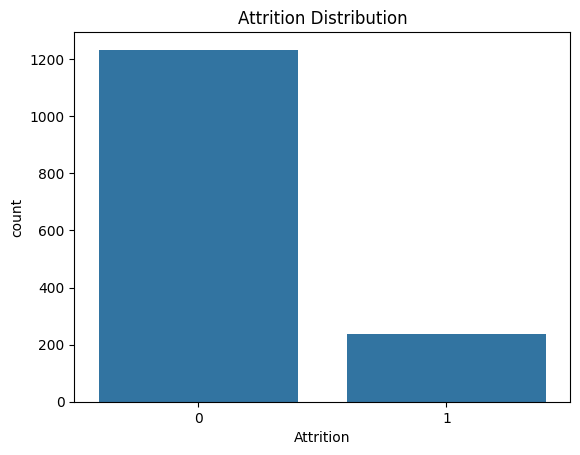

In [29]:
# Attrition Count
sns.countplot(x='Attrition', data=df)
plt.title("Attrition Distribution")
plt.show()

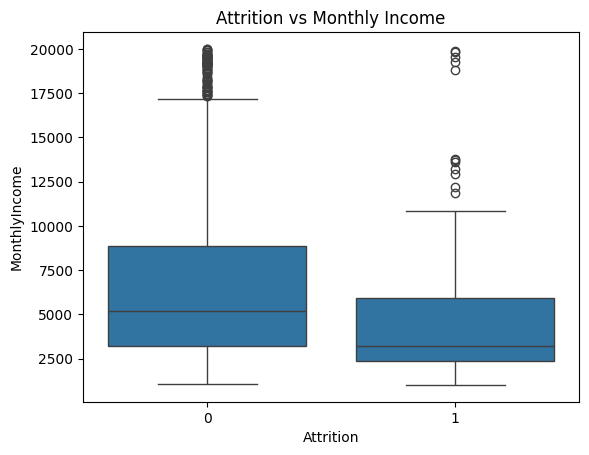

In [30]:
# Attrition vs Monthly Income
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Attrition vs Monthly Income")
plt.show()

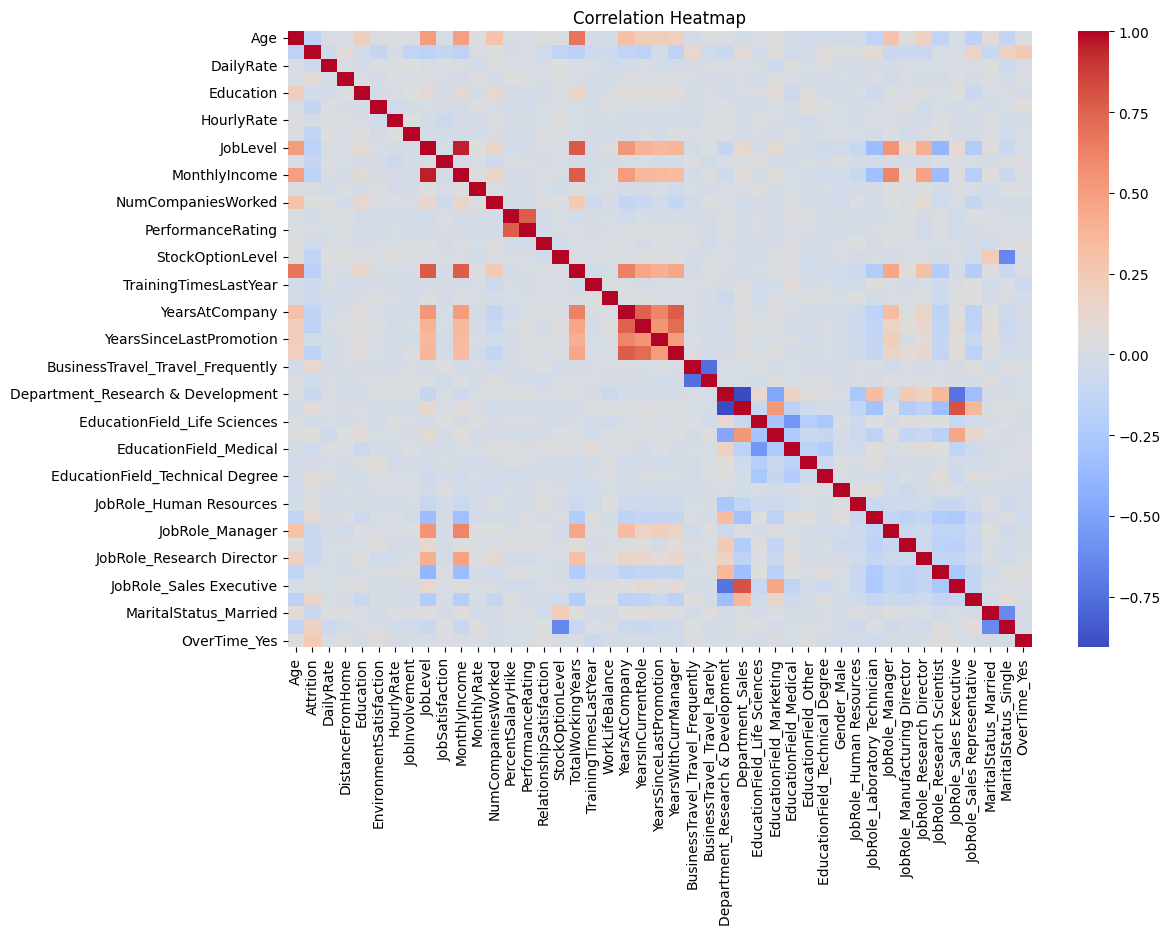

In [32]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [33]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression Report:\n")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Report:

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       247
           1       0.82      0.19      0.31        47

    accuracy                           0.86       294
   macro avg       0.84      0.59      0.62       294
weighted avg       0.86      0.86      0.83       294



In [34]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Report:\n")
print(classification_report(y_test, y_pred_rf))


Random Forest Report:

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.42      0.11      0.17        47

    accuracy                           0.83       294
   macro avg       0.63      0.54      0.54       294
weighted avg       0.78      0.83      0.79       294



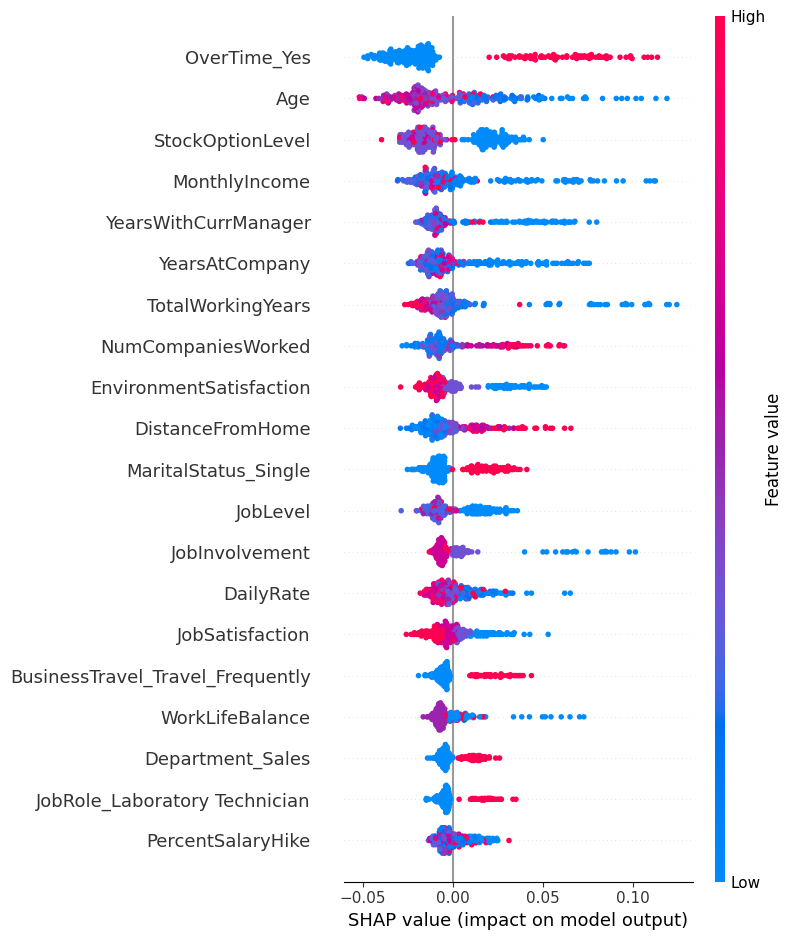

In [36]:
shap.summary_plot(shap_values_rf[:, :, 1], X_test)

In [39]:
idx = 0

# Force plot
shap.initjs()
# Use shap.plots.force() for single instance force plots
shap.plots.force(
    explainer_rf.expected_value[1],
    shap_values_rf[idx, :, 1],
    X_test.iloc[idx],
)

In [40]:
# Feature importance from Random Forest
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 10 Features Influencing Attrition:")
print(importances.head(10))



Top 10 Features Influencing Attrition:
MonthlyIncome           0.072306
Age                     0.072260
TotalWorkingYears       0.053589
DailyRate               0.051670
HourlyRate              0.047866
DistanceFromHome        0.047793
MonthlyRate             0.047228
YearsAtCompany          0.044137
OverTime_Yes            0.037830
YearsWithCurrManager    0.035452
dtype: float64


In [41]:
print("\n🔎 Actionable HR Suggestions:")
print("""
1. Reduce excessive overtime where possible (OverTime_Yes is highly influential).
2. Improve employee satisfaction in low-rated departments.
3. Provide growth paths for roles with higher attrition.
4. Improve work-life balance via wellness programs and flexibility.
5. Monitor early leavers: high attrition in employees with <2 years tenure.
""")



🔎 Actionable HR Suggestions:

1. Reduce excessive overtime where possible (OverTime_Yes is highly influential).
2. Improve employee satisfaction in low-rated departments.
3. Provide growth paths for roles with higher attrition.
4. Improve work-life balance via wellness programs and flexibility.
5. Monitor early leavers: high attrition in employees with <2 years tenure.

